<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0718/01_2_(solution)Dataset_preparation_for_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset preparation for Detection

Object Detection Dataset은 어떤 형식이어야 할지 먼저 생각해보자.

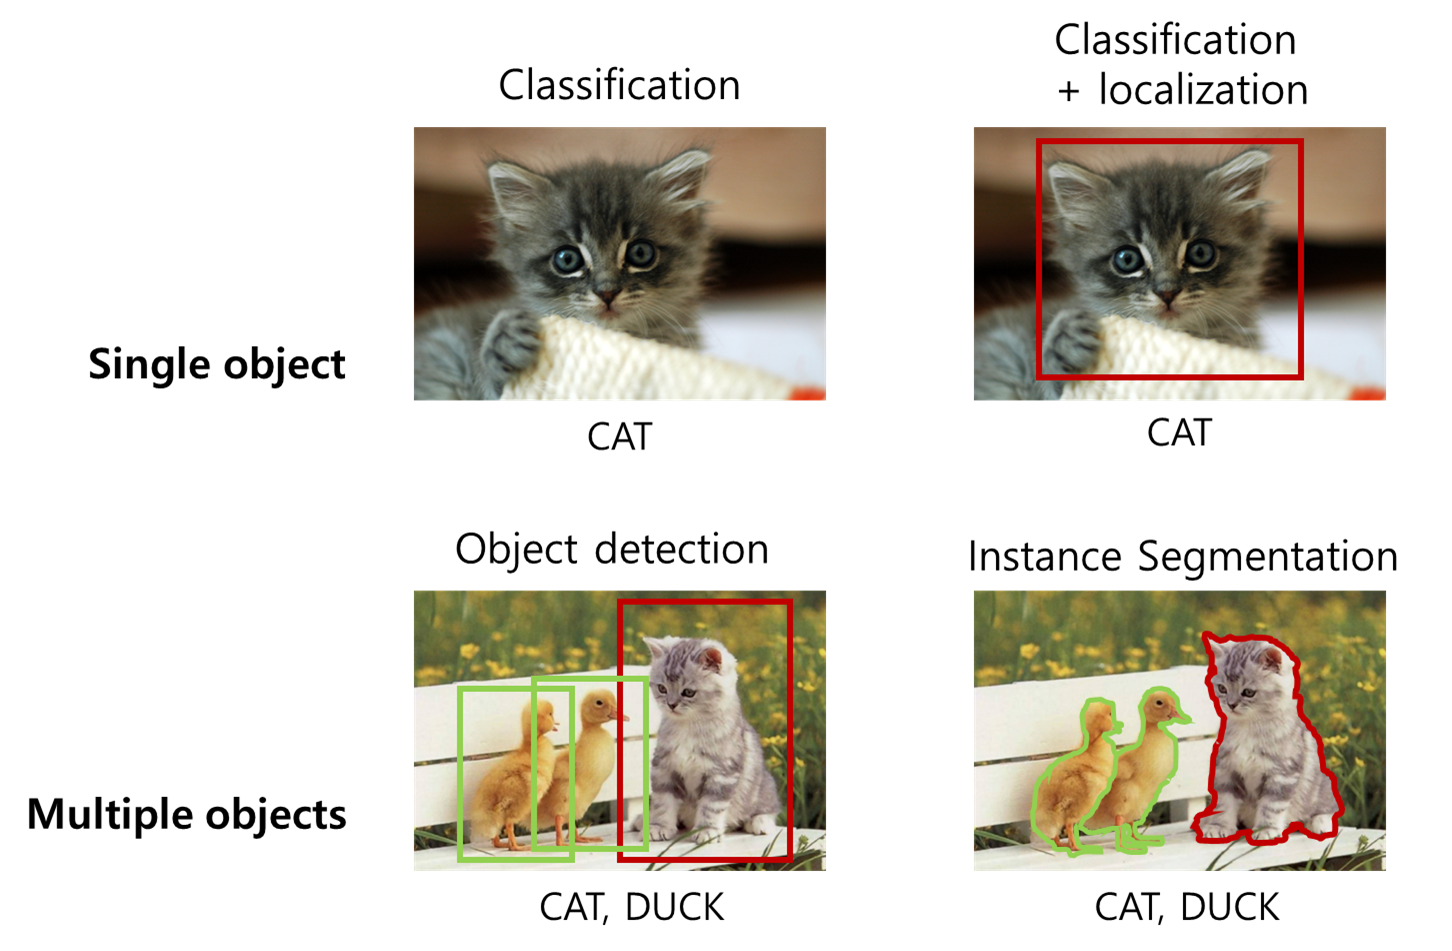

이미지 출처: https://wallpaperaccess.com/cute-baby-animal

## custom dataset 다운로드

* darknet에서 제공되는 YOLOv4의 weights는 COCO (Microsoft Common Objects in Context) dataset으로 학습된 weights이다.
* COCO dataset은 약 80개의 class에 해당하는 이미지 33만개를 포함하며 object detection 등 다양한 task에 널리 사용되고 있다.

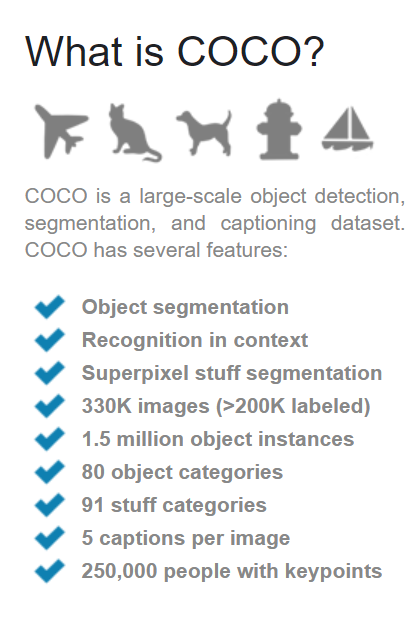

출처: https://cocodataset.org/#home



* 우리는 마스크를 썼는지 구분하기 위한 데이터셋을 다운로드한다.
* 데이터셋을 다운로드 받기 위하여 roboflow에 접속하여 회원가입을 진행한다.
* roboflow 링크: https://public.roboflow.com/

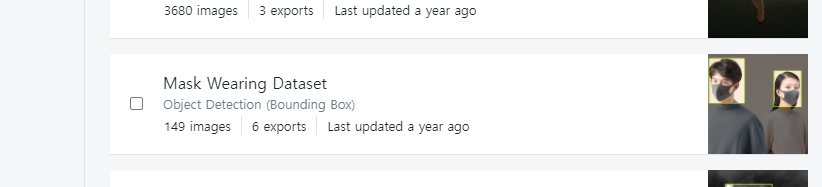

* 회원가입을 완료한 후 Mask Wearing Dataset을 클릭한다. (Public Datasets는 무료로 사용 가능한 dataset이다.)

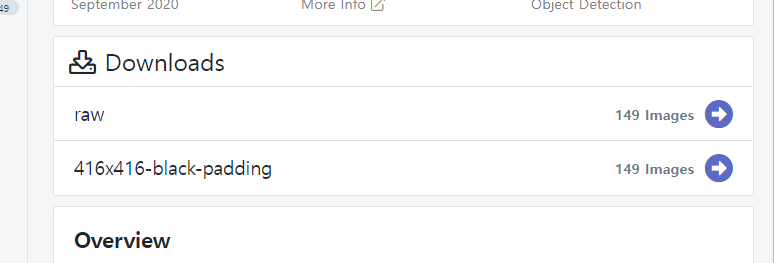

* Downloads에서 416x416-black-padding을 클릭한다.

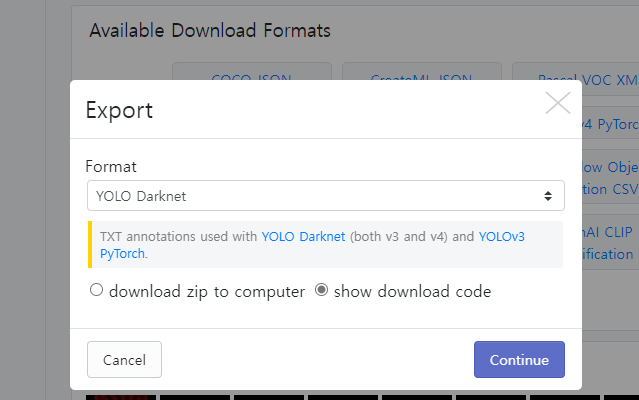

* YOLO Darknet을 클릭하여 show download code를 선택하고 continue를 클릭한다.
* continue를 실행하여 "direct link to download yout zip file is:" 메시지와 함께 링크가 주어진다. 해당 링크를 복사한다. (링크에는 개인 정보가 포함되어 있기 때문에 유출되지 않도록 한다.)

`curl`
* web에 요청을 하는 명령어이다.

`-L`
* 서버링크가 다른 주소로 re-direct되어 있을 경우 re-direct 주소까지 접속하는 curl 옵션이다.

In [ ]:
# roboflow에서 마스크 데이터 다운로드

!curl -L "https://public.roboflow.com/ds/JI1cZNbhix?key=omkowlRIOl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0   3403      0 --:--:-- --:--:-- --:--:--  3390
100 3786k  100 3786k    0     0  3461k      0  0:00:01  0:00:01 --:--:-- 28.7M
Archive:  roboflow.zip
 extracting: test/phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.jpg  
 extracting: train/1580128422_jpg.rf.182b42586c5d5ea95a75c17449c48ad3.jpg  
 extracting: test/1579924271_jpg.rf.be5b27c2b2801bccc191e6dbd9bfccca.jpg  
 extracting: train/w1240-p16x9-5f8aa310737f8e0e6c43d95a68a82b03b6f60106_jpg.rf.104bedd5b3bad4a0d0a453203e0617a3.jpg  
 extracting: train/pollution-mask-CE5HYF_jpg.rf.21d8ab9eb19a6cd10956c96a0cfeff57.jpg  
 extracting: test/shutterstock_1627199179_jpg.rf.8432d033a37b3d142ec4ffcede508c7d.jpg  
 extracting: train/1-200102094256105_png.rf.22dcc10b1378b9ea7f05c83d04c052aa.jpg  
 extracting: test/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56

* 다음과 같이 train, test dataset 폴더가 생성되었는지 확인

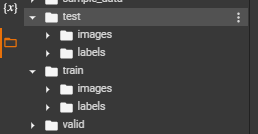

## image & label 데이터 병합
* train, test, valid 폴더에 있는 images, labels 데이터를 모두 한 폴더에 모아보자.

`mkdir()`
* 현재 디렉토리에 폴더를 생성한다.

In [ ]:
# 폴더 병합
import shutil
import os

# parent_folder에 folder_name이 기존에 없을 경우 새로 생성하는 함수 생성
def make_new_folder(folder_name, parent_folder):

    # Path
    path = os.path.join(parent_folder, folder_name)

    # Parent folder에 새로운 폴더 생성
    try:
        mode = 0o777

        # Path에 폴더 생성
        os.mkdir(path, mode)
    except OSError as error:
        print(error)

`getcwd()`
* 현재 디렉토리를 출력한다.

`%cd [directory]`
* 현재 디렉토리를 변경한다.

In [ ]:
# 현재 디렉토리 지정
%cd /content
current_folder = os.getcwd()

/content


`os.listdir()`
* 디렉토리에 있는 파일명을 리스트로 반환한다.

In [ ]:
path = os.path.join('/content', 'train')

In [ ]:
os.listdir(path)

['skynews-coronavirus-london-fashion-week_4920359_jpg.rf.cf79aa98be9f8687d550dc35caf9edb6.txt',
 'w1240-p16x9-5f8aa310737f8e0e6c43d95a68a82b03b6f60106_jpg.rf.104bedd5b3bad4a0d0a453203e0617a3.txt',
 '1042977068_jpg.rf.84c3af9736d1fe2db012d0e91aee5b23.txt',
 'ST_20170401_EASAND_3046471_jpg.rf.53b81c9038b86e2964978d3d9eefea8f.jpg',
 '000_1ov3n5_0_jpeg.rf.a23f1c89491779996f4519858277a4e0.jpg',
 'r1000019q679o5611r7_jpg.rf.edff9783255fac6a6ee79a6e985c7af9.jpg',
 'W37H3GWNO5EV5HTJQNP4KLIRGI_jpg.rf.6b7420e9e1049f6ac7241cce59dcc6a8.txt',
 'soo(1)_jpg.rf.d722163e3c3e0b9f1e4b7a73ea6893cb.txt',
 'w1240-p16x9-5f8aa310737f8e0e6c43d95a68a82b03b6f60106_jpg.rf.104bedd5b3bad4a0d0a453203e0617a3.jpg',
 '1477443223-1445746883_jpg.rf.d05e6a29597722ffcdb222614c353915.jpg',
 'smartmi-3pcs-filter-mask-pm25-haze-dustproof-mask-with-vent_jpg.rf.c5b0c5b7666032c5b4634740eafde234.txt',
 'Smog-Mask-PM2-5-Carbon-Filter-Face-Masks-Fog-Dust-Air-Cleaner-anti-pollution-Face-Protector_jpg.rf.282b5e45b24750c08d6ea03ec9120

In [ ]:
# 합칠 폴더 목록
folders = ['test', 'train', 'valid']


# folders에 포함된 폴더 내부 콘텐츠 리스트를 딕셔너리로 저장
content_list = {}
for index, folder in enumerate(folders):
    path = os.path.join(current_folder, folder) # path = content/test -> content/train -> content/valid
    filenames = os.listdir(path) # os.listdir = [파일경로1, 파일경로2, ...]
    filenames.remove('_darknet.labels')
    content_list[folders[index]] = filenames

# content_list = filter(lambda a: a != '.ipynb_checkpoints', content_list)
content_list # {'test' : [test filenames], 'train' : [train filenames], 'valid' : [valid filenames]}

{'test': ['the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg',
  '0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.txt',
  '126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg',
  '0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg',
  '1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.txt',
  '15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.txt',
  'RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg',
  '1224331650_g_400-w_g_jpg.rf.b816f49e2d84044fc997a8cbd55c347d.jpg',
  '15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.jpg',
  '126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.txt',
  'w1240-p16x9-fa978043deff83fed485af12d16e39c61398fc30_jpg.rf.185d01b7e55e049c6661b8ecd49679fc.jpg',
  'w1240-p16x9-2019-10-04t075956z_1862636027_rc15d4d49d00_rtrmadp_3_hongkong-protests_jpg.rf.06

In [ ]:
# 새롭게 생성할 폴더명 지정
merge_folder = "images"

# 새롭게 생성할 폴더 디렉토리 지정
merge_folder_path = os.path.join('/content', merge_folder)

# 새로운 폴더 생성
make_new_folder(merge_folder, '/content')

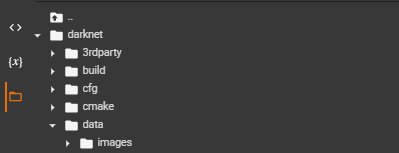

* images 폴더가 생성되었다.

In [ ]:
merge_folder_path

'/content/images'

In [ ]:
# 모든 파일을 수회하며
for sub_dir in content_list: # {'test' : [test filenames], 'train' : [train filenames], 'valid' : [valid filenames]}
    for contents in content_list[sub_dir]: # [test filenames] -> [train filenames] -> [valid filenames]

        # 파일을 이동시킬 폴더 주소 지정
        path_to_content = sub_dir + "/" + contents # test/testfilename1, ...

        # 현재 주소 지정
        dir_to_move = os.path.join('/content', path_to_content) # content/test/testfilename1, /

        # 파일 이동
        shutil.move(dir_to_move, merge_folder_path)

In [ ]:
# 폴더 컨텐츠 개수 출력
len(os.listdir('images'))

298

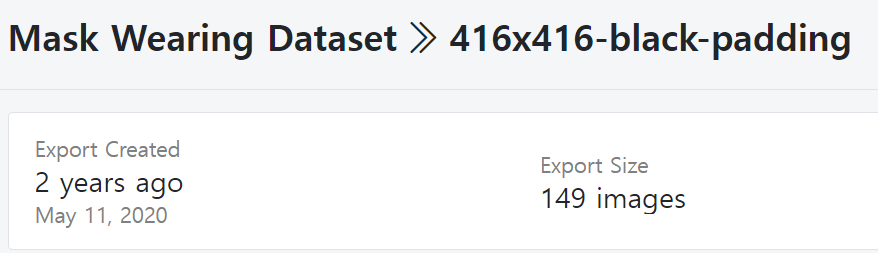

* 한 폴더 내에 149개의 이미지, 149개의 텍스트 총 298개의 파일이 제대로 합쳐진 것을 확인할 수 있다.

## .data(Darknet) 데이터 생성하기

* object detection을 수행하기 위하여 YOLOv4의 개발자 AlexeyAB의 Darknet repository를 사용하여보자.

Darknet

    - YOLO의 개발자 Joseph Redmon이 개발한 신경망 프레임워크.
    - YOLO, RBB 등 DNN(Deep Neural Network)들을 학습시키고 실행시킬 수 있는 프레임워크
    - C, CUDA로 작성된 오픈 소스이며, C로 개발되었기 때문에 연산이 빠른 장점이 있음.
    - CPU 및 GPU 연산을 지원

* Darknet 기반으로 YOLO를 훈련시키려면 필요한 3가지 데이터가 있다.


    1. .data : 데이터 경로 파일

    2. .cfg : 모델 아키텍처 파일

    3. .weight : 모델 파라미터 파일

* 그 중 .data 파일을 먼저 만들어보자.


### .data파일 정보
이 파일의 내용에는 모델에 쓰일 모든 자료의 경로가 들어있어야한다.

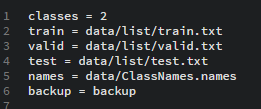

`open(파일 경로, mode= 'r'/'w'/'a'/'x'/'b'/'t')`

* Python에서 제공하는 함수로 파일을 생성하거나 읽을 수 있다.
* 'r' = 읽기 모드
* 'w' = 쓰기 모드, 파일이 존재할 경우 파일 처음부터 내용 작성, 파일이 존재하지 않는다면 파일을 생성
* 'a' = 쓰기 모드, 파일이 존재할 경우 파일 끝에서부터 내용 작성
* 'x' = 파일 생성 뒤 쓰기 모드, 파일이 있으면 에러 발생
* 'b' = 바이너리 모드
* 't' = 텍스트 모드

참고: https://docs.python.org/ko/3/library/functions.html?highlight=open#open

In [ ]:
# mask_data.data 파일 생성
t = open('/content/mask_data.data', 'w')

### classes

`cat`
* 파일의 내용을 출력하는 명령어이다.

In [ ]:
!cat test/_darknet.labels

mask
no-mask

* class가 mask, no-mask로 2개가 존재한다.

`write(문자열)`
* Python에서 제공하는 함수로 열린 파일에 문자열을 입력할 수 있다.
* 줄을 바꾸고 싶다면 직접 개행문자('\n')을 입력하여야 한다.

In [ ]:
# mask_data.data에 기록
t.write("classes = 2\n")

12

### train, test, valid

* train.txt,valid.txt, test.txt 파일을 생성하여보자.
* 각 텍스트 파일은 train, valid, test 과정에 사용될 이미지 리스트를 포함하고 있다.

* train, test, valid 폴더 내의 _darknet.labels를 삭제한다.

`!rm`

* 현재 디렉토리의 파일을 삭제한다.

In [ ]:
# 이후 이미지 데이터셋을 저장할 경로 지정
path = "/content/images/"
# test.txt 생성
# w 모드로 text 파일을 생성
f = open('/content/test.txt', 'w')
for img_fname in content_list['test']:
    if img_fname[-3:]=='jpg':
        # 문자 입력
        f.write(path+img_fname+"\n")
f.close()

# train.txt 생성
# w 모드로 text 파일을 생성
f = open('/content/train.txt', 'w')
for img_fname in content_list['train']:
    if img_fname[-3:]=='jpg':
        # 문자 입력
        f.write(path+img_fname+"\n")
f.close()

# valid.txt 생성
# w 모드로 text 파일을 생성
f = open('/content/valid.txt', 'w')
for img_fname in content_list['valid']:
    if img_fname[-3:]=='jpg':
        # 문자 입력
        f.write(path+img_fname+"\n")
f.close()

In [ ]:
# mask_data.data에 기록

t.write("train = data/train.txt\n")
t.write("valid = data/valid.txt\n")
t.write("test = data/test.txt\n")

21

### names

In [ ]:
# ClassNames.names 생성
# w 모드로 name 파일을 생성
f = open('/content/ClassNames.names', 'w')

# 문자 입력
f.write("mask"+"\n")
f.write("no-mask")

# 파일 닫기
f.close()

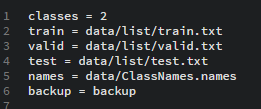

In [ ]:
# mask_data.data에 기록

t.write("names = data/ClassNames.names\n")

30

### backup

* training 중간 결과를 저장할 backup 주소를 생성하여보자.

In [ ]:
# mask_data.data에 기록

t.write("backup = backup/")
t.close()

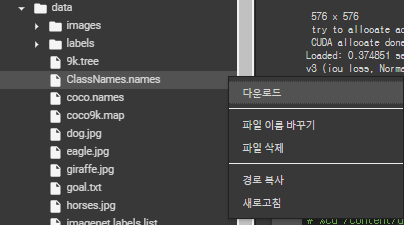

데이터셋 파일 정리
* mask_data.data

* ClassNames.names
* test.txt
* train.txt
* valid.txt
